# Student Grades Prediction with Linear Regression model

I took the dataSet from Kaggle. To solve the problem I used the method of Linear Regression.


by Ron Shvindelman

# 1. Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df= pd.read_csv(r'C:\Users\97254\OneDrive\מסמכים\recs_Amit\regression\student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### we can see that all data hasn't Nan values - we don't need to filter the data

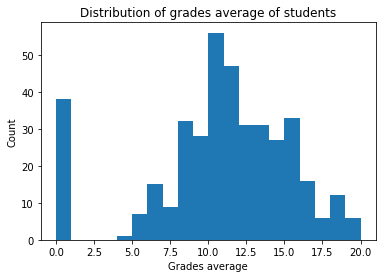

In [5]:
plt.hist(df['G3'], bins=20, range=[0,20])
plt.title('Distribution of grades average of students')
plt.xlabel('Grades average')
plt.ylabel('Count')
plt.show()

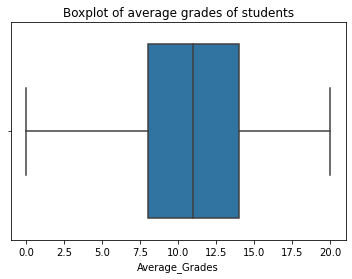

In [6]:
ax=sns.boxplot(df['G3'])
ax.set_title('Boxplot of average grades of students')
ax.set_xlabel('Average_Grades')
plt.show()

#### The majority of G3 between 8 and 13.
#### we can see that the common average is 11

## Personal info

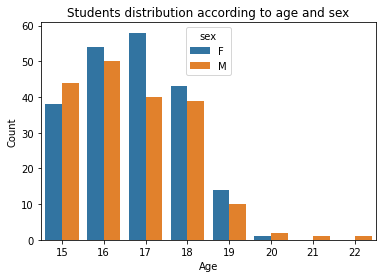

In [90]:
bx=sns.countplot('age',hue='sex',data=df)
bx.set_title('Students distribution according to age and sex')
bx.set_xlabel('Age')
bx.set_ylabel('Count')
plt.show()

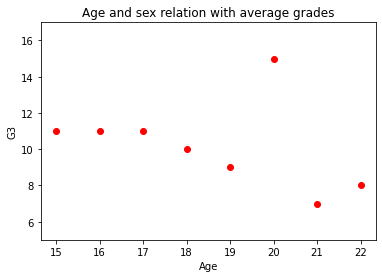

In [7]:
age_median = []
for i_age in df.age.unique():
    age_median.append(df[df.age == i_age]['G3'].median())

plt.scatter(df.age.unique(),age_median,color='r')
plt.xlabel('Age')
plt.ylabel('G3')
plt.ylim([5.0, 17.0])
plt.title('Age and sex relation with average grades')
plt.show()


#### the majority of students are aged between 15 and 18.
#### It is seemed that young age has an impact on the grades.  


## family

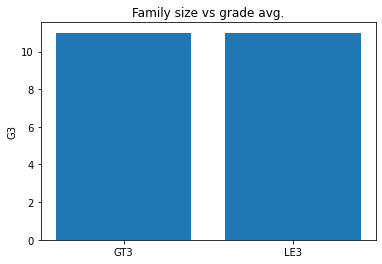

In [9]:
plt.bar(['GT3', 'LE3'], [df[df.famsize == 'GT3']['G3'].median(),df[df.famsize == 'LE3']['G3'].median()])
plt.ylabel('G3')
plt.title('Family size vs grade avg.')
plt.show()

### we can see that the family size don't effect the grade

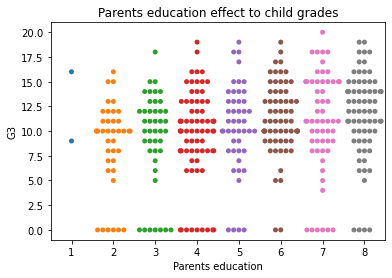

In [28]:
Pedu = df['Fedu'] + df['Medu']
ax = sns.swarmplot(x=Pedu,y=df['G3'])
ax.set_title('Parents education effect to child grades')
ax.set_xlabel('Parents education')
ax.set_ylabel('G3')
plt.show()

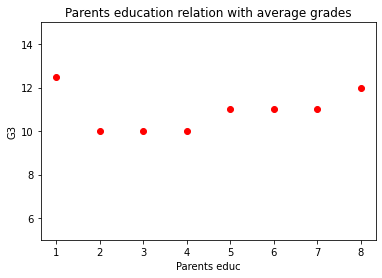

In [11]:
Pedu = df['Fedu'] + df['Medu']
df['pedu']=Pedu
level_educ_median=[]
for i_level in Pedu.unique():
    level_educ_median.append(df[df.pedu == i_level]['G3'].median())

plt.scatter(Pedu.unique(),level_educ_median,color='r')
plt.xlabel('Parents educ')
plt.ylabel('G3')
plt.ylim([5.0, 15.0])
plt.title('Parents education relation with average grades')
plt.show()


### As the quality of Parents education is better, it effects the students average positively

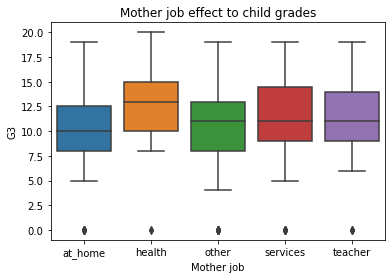

In [27]:
ax=sns.boxplot(x=df['Mjob'],y=df['G3'])
ax.set_title('Mother job effect to child grades')
ax.set_xlabel('Mother job')
ax.set_ylabel('G3')
plt.show()

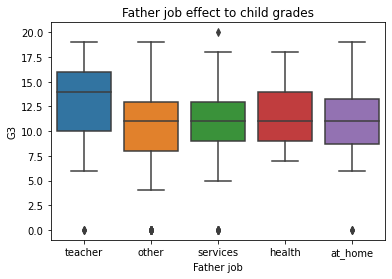

In [26]:
ax=sns.boxplot(x=df['Fjob'],y=df['G3'])
ax.set_title('Father job effect to child grades')
ax.set_xlabel('Father job')
ax.set_ylabel('G3')
plt.show()

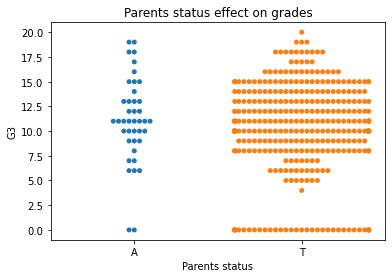

In [25]:
ax = sns.swarmplot (x='Pstatus',y='G3',data=df)
ax.set_title('Parents status effect on grades')
ax.set_xlabel('Parents status')
ax.set_ylabel('G3')
plt.show()

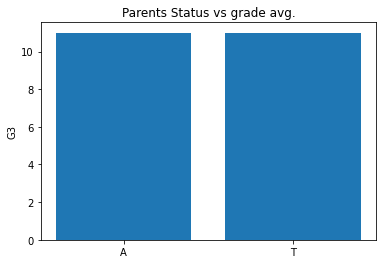

In [15]:
plt.bar(['A', 'T'], [df[df.Pstatus == 'T']['G3'].median(),df[df.Pstatus == 'A']['G3'].median()])
plt.ylabel('G3')
plt.title('Parents Status vs grade avg.')
plt.show()

#### It is seemed as if relation status in family doesn't effect the average

Text(0, 0.5, 'G3')

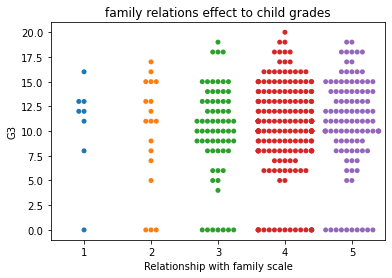

In [24]:
ax=sns.swarmplot(x=df['famrel'], y=df['G3'])
ax.set_title('family relations effect to child grades')
ax.set_xlabel('Relationship with family scale')
ax.set_ylabel('G3')

Text(0.5, 1.0, 'family relations effect to child grades')

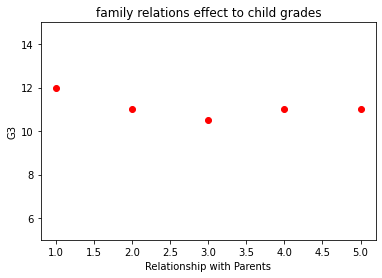

In [23]:
relations_median = []
for i_qual_Rel in df.famrel.unique():
    relations_median.append(df[df.famrel == i_qual_Rel]['G3'].median())

plt.scatter(df.famrel.unique(),relations_median,label='Scatter Plot 1',color='r')
plt.xlabel('Relationship with Parents')
plt.ylabel('G3')
plt.ylim([5.0, 15.0])
plt.title('family relations effect to child grades')

#### the median average of students isn't affected much by relations between them and their parents

#### Students with educated parents have slightly higher grades.
#### Students with fathers and mothers working in health score better than others

## Location

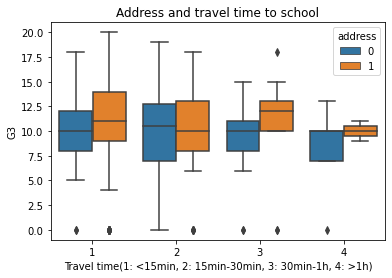

In [93]:
ax=sns.boxplot(x='traveltime',y='G3',hue='address',data=df)
ax.set_title('Address and travel time to school')
ax.set_xlabel('Travel time(1: <15min, 2: 15min-30min, 3: 30min-1h, 4: >1h)')
ax.set_ylabel('G3')
plt.show()

#### Students living more than 1 hour far from school score less than others.
#### Also students living in urban side score more than those living in the rural side.

## Activities and friends

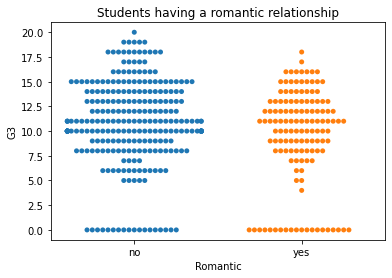

In [21]:
ax=sns.swarmplot(x='romantic',y='G3',data=df)
ax.set_title('Students having a romantic relationship')
ax.set_xlabel('Romantic')
ax.set_ylabel('G3')
plt.show()

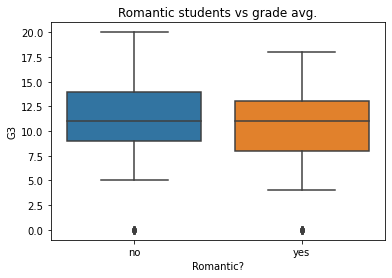

In [20]:
ax=sns.boxplot(x=df['romantic'],y=df['G3'])
ax.set_ylabel('G3')
ax.set_xlabel('Romantic?')
ax.set_title('Romantic students vs grade avg.')
plt.show()

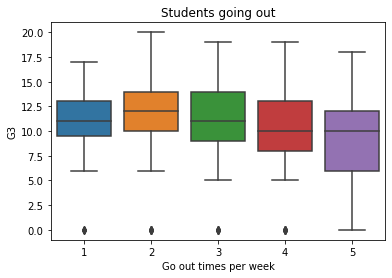

In [29]:
ax = sns.boxplot(x=df['goout'],y=df['G3'])
ax.set_title('Students going out')
ax.set_xlabel('Go out times per week')
ax.set_ylabel('G3')
plt.show()

Text(0.5, 1.0, 'Going out effect on Grades')

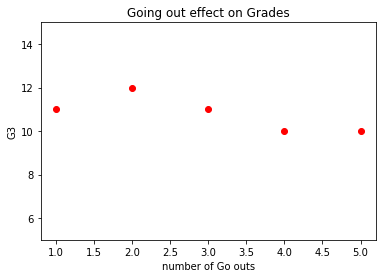

In [30]:
Going_Out_median = []
for i_num_Go in df.goout.unique():
    Going_Out_median.append(df[df.goout == i_num_Go]['G3'].median())

plt.scatter(df.goout.unique(),Going_Out_median,color='r')
plt.xlabel('number of Go outs')
plt.ylabel('G3')
plt.ylim([5.0, 15.0])
plt.title('Going out effect on Grades')

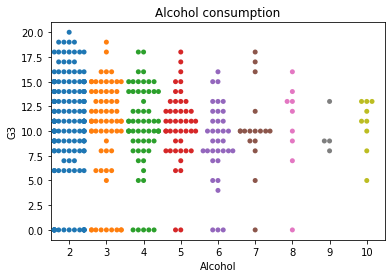

In [31]:
alc= df['Walc'] + df['Dalc'] 
ax=sns.swarmplot(x=alc,y=df['G3'])
ax.set_title('Alcohol consumption')
ax.set_xlabel('Alcohol')
ax.set_ylabel('G3')
plt.show()

Text(0.5, 1.0, 'Alcohol consumption effect')

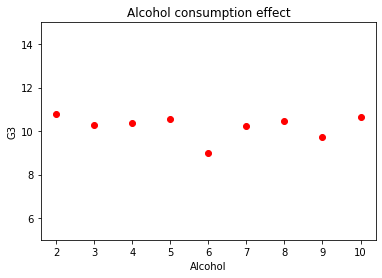

In [32]:
alc= df['Walc'] + df['Dalc'] 
df['alc']=alc
Quantities_Consump = []
for i_num_Drink in df.alc.unique():
    Quantities_Consump.append(df[df.alc == i_num_Drink]['G3'].mean())

plt.scatter(alc.unique(),Quantities_Consump,color='r')
plt.xlabel('Alcohol')
plt.ylabel('G3')
plt.ylim([5.0, 15.0])
plt.title('Alcohol consumption effect')

#### Students having a romantic relationship have lower grades.
#### Freetime and extra activities do not affect grades. 
#### Alcohol consumption doesn't effect the G3 Grade much.

## Discipline

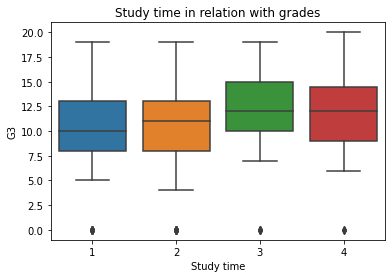

In [33]:
ax= sns.boxplot(x=df['studytime'],y=df['G3'])
ax.set_title('Study time in relation with grades')
ax.set_xlabel('Study time')
ax.set_ylabel('G3')
plt.show()

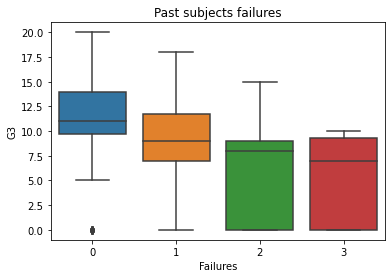

In [35]:
ax = sns.boxplot(x=df['failures'],y=df['G3'])
ax.set_title('Past subjects failures')
ax.set_xlabel('Failures')
ax.set_ylabel('G3')
plt.show()

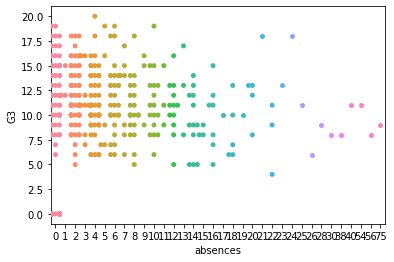

In [36]:
x= sns.swarmplot(x=df['absences'],y=df['G3'])
ax.set_title('Absence effect on results')
ax.set_xlabel('Number of absence')
ax.set_ylabel('G3')
plt.show()


Text(0.5, 1.0, 'absences vs grade')

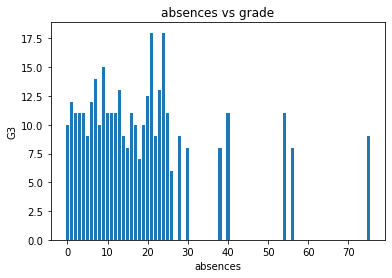

In [37]:
absences = []
for i_num_absences in df.absences.unique():
    absences.append(df[df.absences == i_num_absences]['G3'].median())

plt.bar(df.absences.unique(),absences)
plt.xlabel('absences')
plt.ylabel('G3')

plt.title('absences vs grade')

#### Higher study time results in better grades.
#### Students with past failures have lower grades.
#### Absence is not affecting grades.

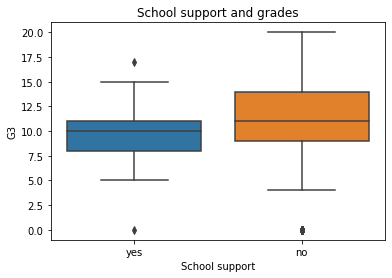

In [38]:
ax=sns.boxplot(x=df['schoolsup'],y=df['G3'])
ax.set_title('School support and grades')
ax.set_xlabel('School support')
ax.set_ylabel('G3')
plt.show()

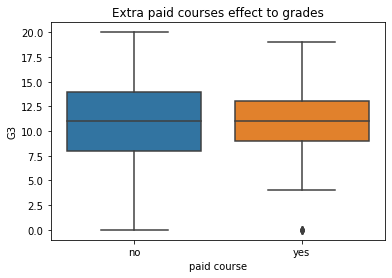

In [39]:
ax=sns.boxplot(x=df['paid'],y=df['G3'])
ax.set_title('Extra paid courses effect to grades')
ax.set_xlabel('paid course')
ax.set_ylabel('G3')
plt.show()

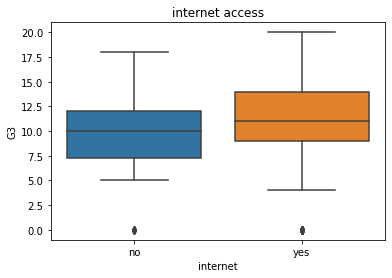

In [40]:
ax= sns.boxplot(x=df['internet'],y=df['G3'])
ax.set_title('internet access')
ax.set_xlabel('internet')
ax.set_ylabel('G3')
plt.show()

#### Paid courses and internet do not affect the grades.

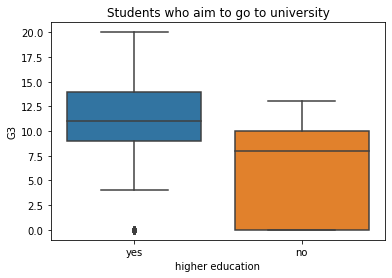

In [41]:
ax=sns.boxplot(x=df['higher'],y=df['G3'])
ax.set_title('Students who aim to go to university')
ax.set_xlabel('higher education')
ax.set_ylabel('G3')
plt.show()

#### Students aiming to join universities later, and which have a higher education already have better grades.

# 2. Data encoding

In [42]:
num_features = [name for name in df.columns if df[name].dtype in ['int64', 'float64']]
cat_features = [name for name in df.columns if df[name].dtype == 'object']

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(cat_features):
    df[i]=le.fit_transform(df[i])

In [76]:
df = df.drop(['pedu', 'alc'], axis=1)
matrix_corr = df.corr()
matrix_corr.G3

school       -0.045017
sex           0.103456
age          -0.161579
address       0.105756
famsize       0.081407
Pstatus      -0.058009
Medu          0.217147
Fedu          0.152457
Mjob          0.102082
Fjob          0.042286
reason        0.121994
guardian     -0.070109
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
schoolsup    -0.082788
famsup       -0.039157
paid          0.101996
activities    0.016100
nursery       0.051568
higher        0.182465
internet      0.098483
romantic     -0.129970
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

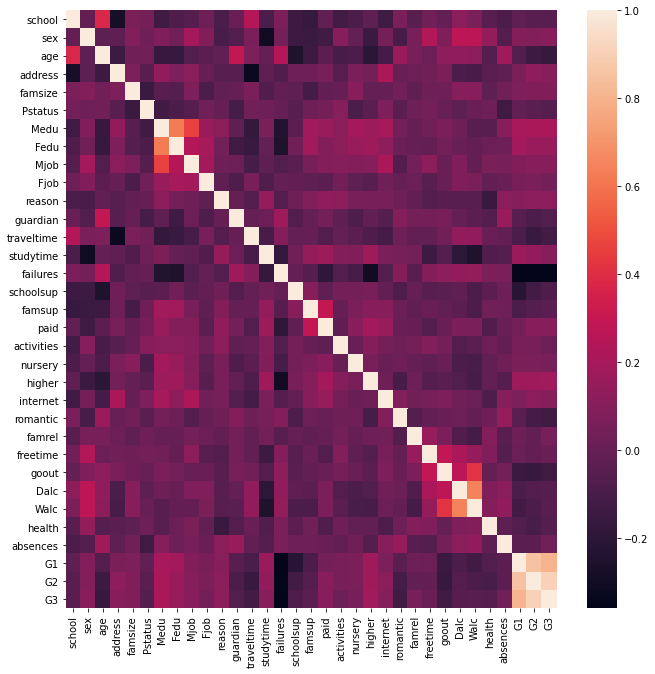

In [90]:
fig = plt.subplots(figsize = (11,11))
sns.heatmap(matrix_corr)

## I'd like to show heatmap for the fatures, that I noticed has an immpact on G3

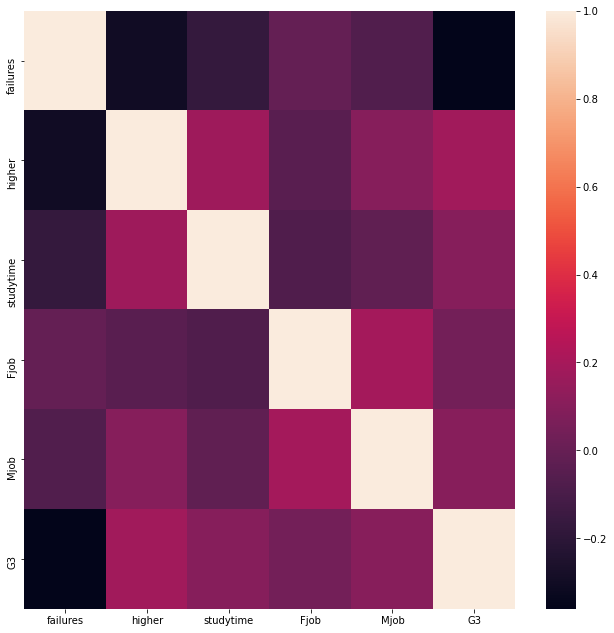

In [92]:
fig = plt.subplots(figsize = (11,11))
sns.heatmap(df[['failures', 'higher', 'studytime', 'Fjob', 'Mjob', 'G3']].corr())

# 3. Split to test/train and linear regression

## a. "failure" feature

In [78]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [79]:
X = df[['failures']]
y = df['G3']


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("R squared :", metrics.r2_score(y_test,y_pred))


MSE : 22.070631435127304
R squared : 0.20001619921577474


Text(0.5, 1.0, 'grade prediction and actual grade')

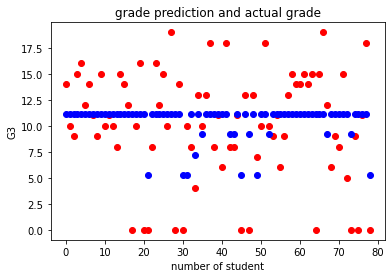

In [81]:
plt.scatter(range(0,len(y_test)),y_test.to_list(),label='y_test', color='r')
plt.scatter(range(0,len(y_test)),y_pred ,label='y_pred',color='b')
plt.xlabel('number of student')
plt.ylabel('G3')
plt.title('grade prediction and actual grade')

#### our model doesn't fit the data as expected, we used only one feature ( the failures ) and we can't expect that using it, we'd predict the result well

## b. without G1,G2

In [82]:
X=df.drop(['G1', 'G2', 'G3'],axis=1)
y=df['G3']


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("R squared :", metrics.r2_score(y_test,y_pred))


MSE : 23.049722150637518
R squared : 0.16452755838514643


Text(0.5, 1.0, 'grade prediction and actual grade')

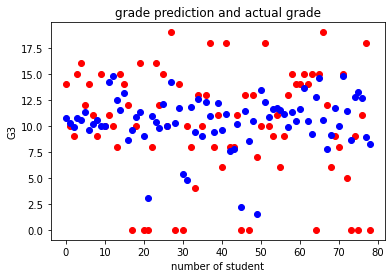

In [84]:
plt.scatter(range(0,len(y_test)),y_test.to_list(),label='y_test', color='r')
plt.scatter(range(0,len(y_test)),y_pred ,label='y_pred',color='b')
plt.xlabel('number of student')
plt.ylabel('G3')
plt.title('grade prediction and actual grade')

### our model  fits better to the data than the previous one, we dropped the grades columns of the student and tried to evaluate the correct average based on the rest features.
### now lets try to evaluate the grades by including G1,G2 features

# c. With Grades included

In [85]:
X=df.drop(['G3'],axis=1)
y=df['G3']


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("R squared :", metrics.r2_score(y_test,y_pred))


MSE : 5.6452655427918526
R squared : 0.795378714078336


Text(0.5, 1.0, 'grade prediction and actual grade')

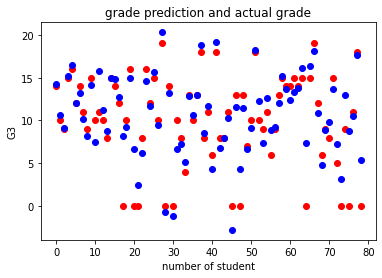

In [88]:
plt.scatter(range(0,len(y_test)),y_test.to_list(),label='y_test', color='r')
plt.scatter(range(0,len(y_test)),y_pred ,label='y_pred',color='b')
plt.xlabel('number of student')
plt.ylabel('G3')
plt.title('grade prediction and actual grade')

### Given grades- G1,G2   the model would evaluate the next grade successfully with R2 of 0.7953